In [1]:
import rioxarray
import xarray as xs
import matplotlib.pyplot as plt
import os
import glob
import datetime
from netCDF4 import Dataset, num2date, date2num
import numpy as np
%matplotlib inline
import pandas as pd
from calendar import isleap
from pandas.tseries.offsets import DateOffset
from pathlib import Path 
import seaborn as sns

In [2]:
region = "South"
grph_name = "Southern"

In [3]:
folder = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional"
folder2 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH_Veg/Merged/Clipped/Unit_Changed/Regional"
# folder3 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional/Graphs"

In [4]:
ec3_hist = xs.open_dataset(os.path.join(folder, "historical_tas_ecearth3_final_"+region+".nc"))
ec3_ssp245 = xs.open_dataset(os.path.join(folder, "ssp245_tas_ecearth3_final_"+region+".nc"))
ec3_ssp585 = xs.open_dataset(os.path.join(folder, "ssp585_tas_ecearth3_final_"+region+".nc"))
ecveg_hist = xs.open_dataset(os.path.join(folder2, "historical_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245 = xs.open_dataset(os.path.join(folder2, "ssp245_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585 = xs.open_dataset(os.path.join(folder2, "ssp585_tas_ecearth_veg_final_"+region+".nc"))

C:\ProgramData\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
esm_hist = (ec3_hist['tas']+ecveg_hist['tas'])/2
esm_ssp245 = (ec3_ssp245['tas']+ecveg_ssp245['tas'])/2
esm_ssp585 = (ec3_ssp585['tas']+ecveg_ssp585['tas'])/2

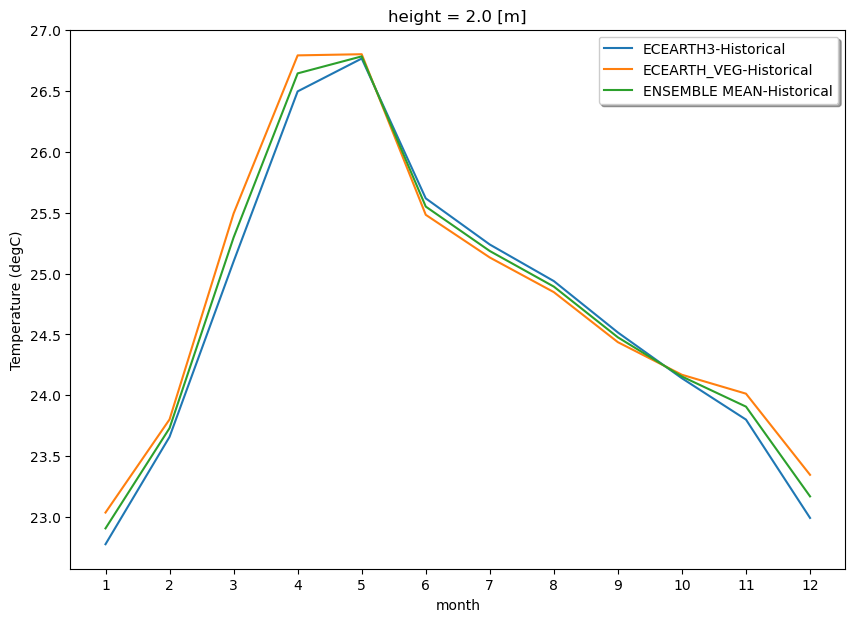

In [7]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper right', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Temperature (degC)')
plt.show()

[ 0.04699714 24.21152956]
[24.2585267  24.30552384 24.35252098 24.39951812 24.44651526 24.4935124
 24.54050954 24.58750668 24.63450382 24.68150096 24.7284981  24.77549524
 24.82249237 24.86948951 24.91648665 24.96348379 25.01048093 25.05747807
 25.10447521 25.15147235 25.19846949]


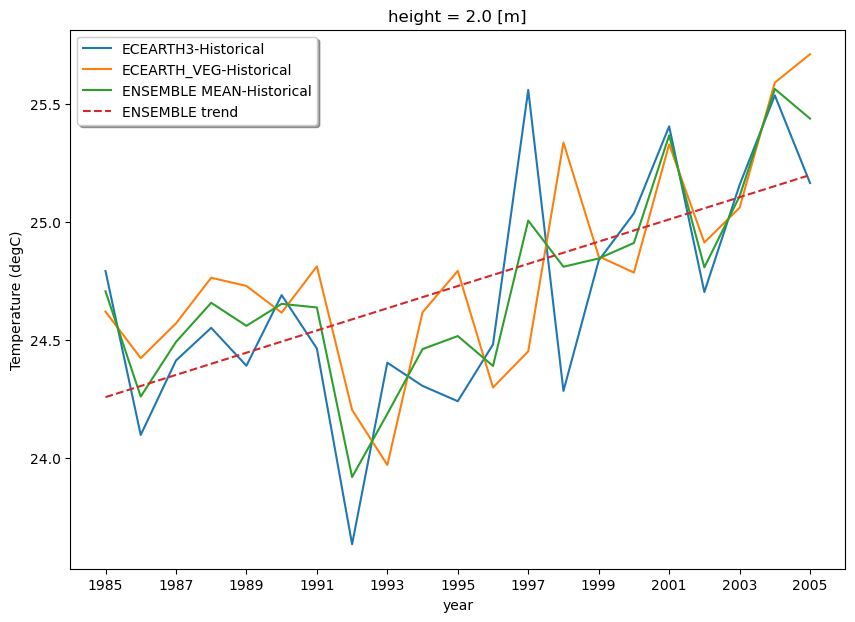

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend = np.polyfit(np.arange(1,22), esm_hist.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig1.png'))

[ 0.03640326 25.22610728]
[25.26251054 25.2989138  25.33531706 25.37172032 25.40812358 25.44452684
 25.4809301  25.51733336 25.55373662 25.59013988 25.62654314 25.6629464
 25.69934966 25.73575291 25.77215617 25.80855943 25.84496269 25.88136595
 25.91776921 25.95417247 25.99057573]


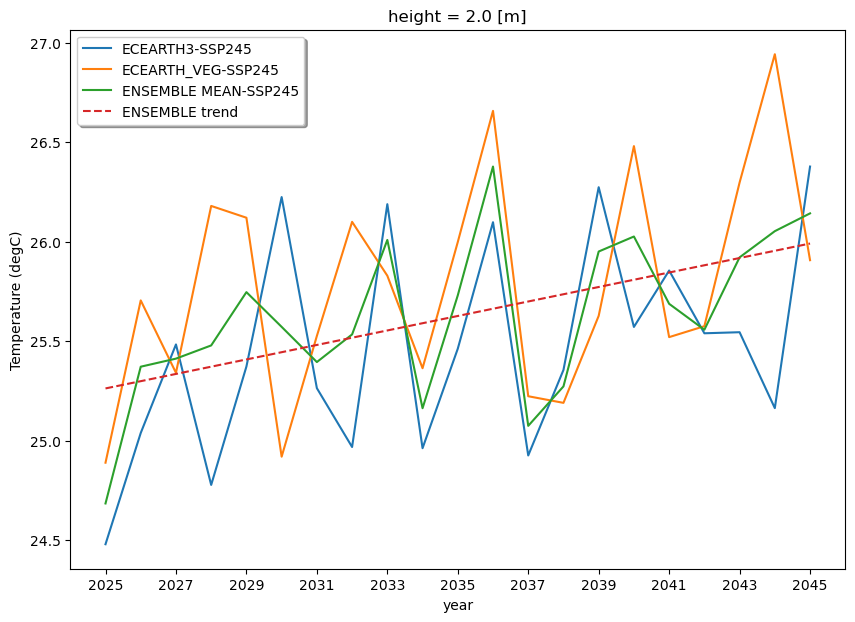

In [7]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend = np.polyfit(np.arange(1,22), esm_ssp245.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig2.png'))

[ 0.04253591 25.35126569]
[25.3938016  25.43633752 25.47887343 25.52140934 25.56394526 25.60648117
 25.64901708 25.69155299 25.73408891 25.77662482 25.81916073 25.86169665
 25.90423256 25.94676847 25.98930439 26.0318403  26.07437621 26.11691213
 26.15944804 26.20198395 26.24451987]


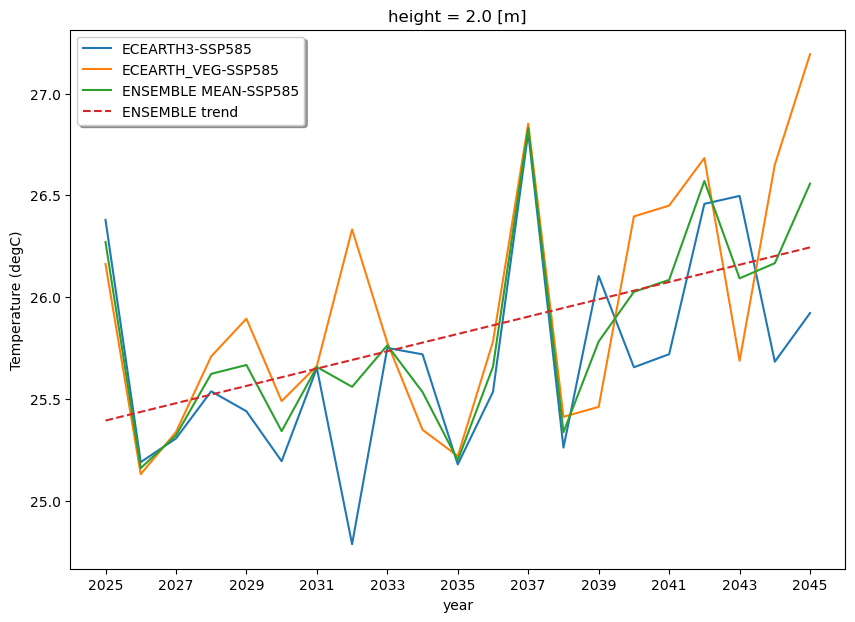

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend = np.polyfit(np.arange(1,22), esm_ssp585.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig3.png'))

In [9]:
Arc_yearly = esm_ssp245.groupby('time.year').mean(['time','lon','lat'])

In [10]:
Arc_yearly

<xarray.DataArray 'tas' (year: 21)>
array([24.684452, 25.371658, 25.412233, 25.478546, 25.746378, 25.571827,
       25.395021, 25.533833, 26.008568, 25.163084, 25.730051, 26.377478,
       25.074451, 25.272654, 25.950409, 26.025826, 25.687643, 25.557404,
       25.921068, 26.052706, 26.142117], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [11]:
Arc_clim = esm_hist.mean()

In [12]:
Arc_clim

<xarray.DataArray 'tas' ()>
array(24.728498, dtype=float32)
Coordinates:
    height   float64 2.0

In [13]:
Arc_anom = Arc_yearly - Arc_clim

In [14]:
df = Arc_anom.to_dataframe()
df['positive'] = df['tas'] > 0
df.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,-0.044046,False
2026,2.0,0.643160,True
2027,2.0,0.683735,True
2028,2.0,0.750048,True
2029,2.0,1.017879,True


[0.03640326 0.49760882]
[0.53401208 0.57041534 0.6068186  0.64322186 0.67962512 0.71602838
 0.75243164 0.7888349  0.82523816 0.86164142 0.89804468 0.93444794
 0.9708512  1.00725446 1.04365772 1.08006098 1.11646424 1.15286749
 1.18927075 1.22567401 1.26207727]


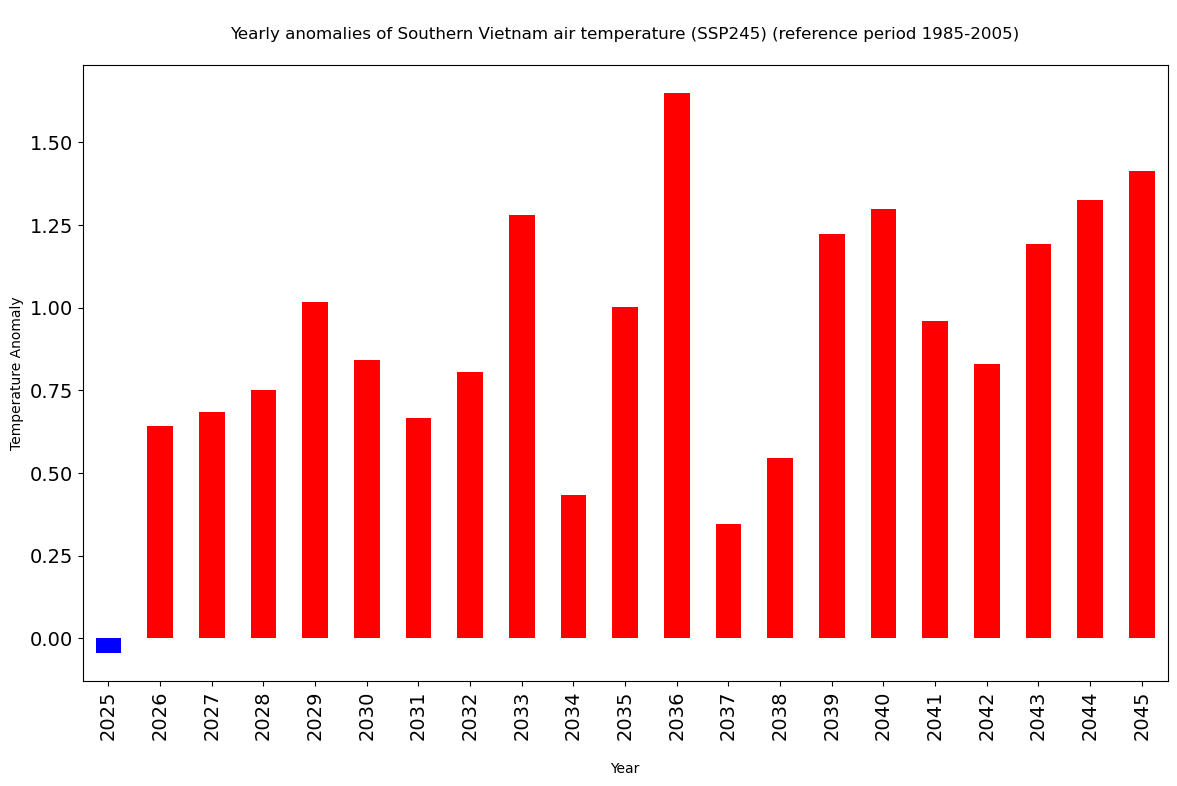

In [15]:
# fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP245) (reference period 1985-2005)\n',
    )
trend = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y= np.arange(1,22)*theta0 + theta1
print(y)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig4.png'))

In [16]:
Arc_yearly2 = esm_ssp585.groupby('time.year').mean(['time','lon','lat'])

In [17]:
Arc_yearly2

<xarray.DataArray 'tas' (year: 21)>
array([26.271011, 25.159887, 25.32123 , 25.623148, 25.66678 , 25.341812,
       25.656898, 25.559458, 25.763342, 25.533607, 25.198631, 25.658405,
       26.830858, 25.336592, 25.782341, 26.02608 , 26.084747, 26.57088 ,
       26.092281, 26.16677 , 26.557613], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [18]:
Arc_clim2 = esm_hist.mean()

In [19]:
Arc_clim2

<xarray.DataArray 'tas' ()>
array(24.728498, dtype=float32)
Coordinates:
    height   float64 2.0

In [20]:
Arc_anom2 = Arc_yearly2 - Arc_clim2

In [21]:
df2 = Arc_anom2.to_dataframe()
df2['positive'] = df2['tas'] > 0
# print(df2)
df2.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,1.542513,True
2026,2.0,0.431389,True
2027,2.0,0.592731,True
2028,2.0,0.894650,True
2029,2.0,0.938282,True


[0.03640326 0.49760882]
[0.53401208 0.57041534 0.6068186  0.64322186 0.67962512 0.71602838
 0.75243164 0.7888349  0.82523816 0.86164142 0.89804468 0.93444794
 0.9708512  1.00725446 1.04365772 1.08006098 1.11646424 1.15286749
 1.18927075 1.22567401 1.26207727]


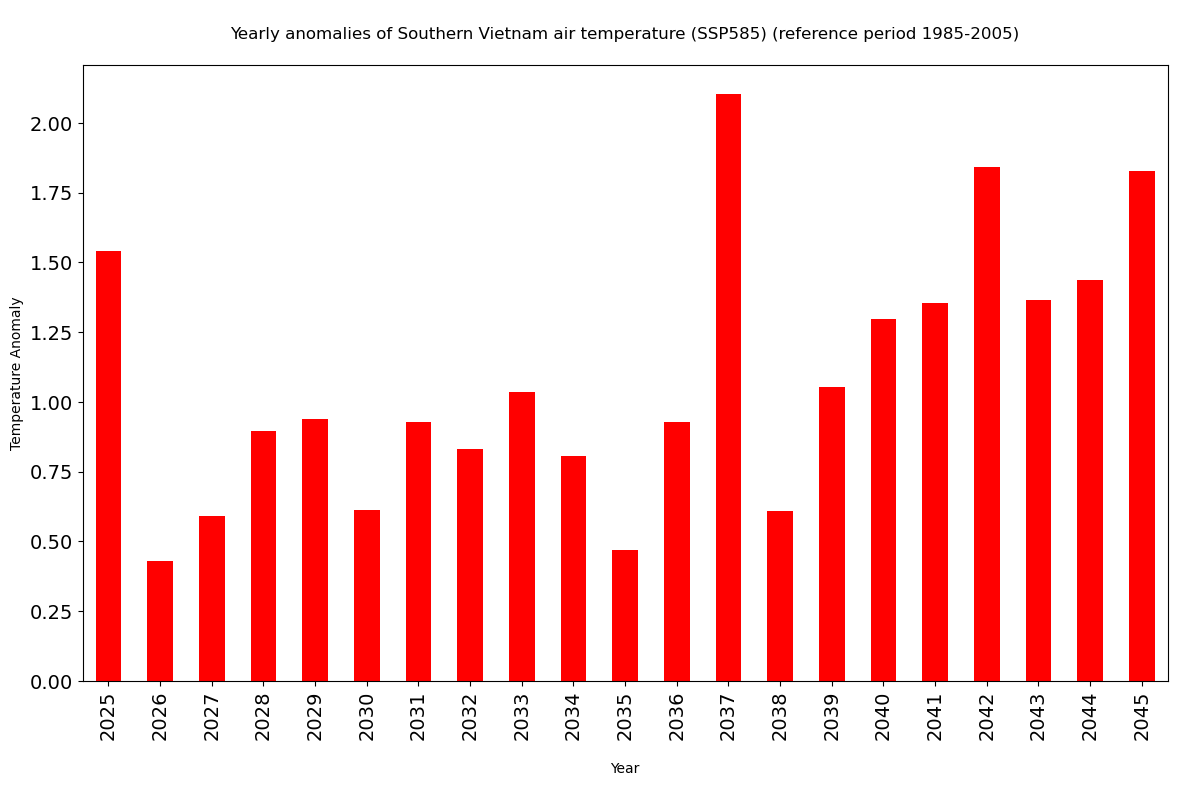

In [22]:
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig,ax = plt.subplots(figsize=(14,8))
df2['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP585) (reference period 1985-2005)\n',
    )
trend2 = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend2)
theta12=trend2[1]
theta02=trend2[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2= np.arange(1,22)*theta02 + theta12
print(y2)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig5.png'))

Precipitation

In [4]:
ec3_hist_pr = xs.open_dataset(os.path.join(folder, "historical_pr_ecearth3_final_"+region+".nc"))
ec3_ssp245_pr = xs.open_dataset(os.path.join(folder, "ssp245_pr_ecearth3_final_"+region+".nc"))
ec3_ssp585_pr = xs.open_dataset(os.path.join(folder, "ssp585_pr_ecearth3_final_"+region+".nc"))
ecveg_hist_pr = xs.open_dataset(os.path.join(folder2, "historical_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245_pr = xs.open_dataset(os.path.join(folder2, "ssp245_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585_pr = xs.open_dataset(os.path.join(folder2, "ssp585_pr_ecearth_veg_final_"+region+".nc"))

C:\ProgramData\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
esm_hist_pr = (ec3_hist_pr['pr']+ecveg_hist_pr['pr'])/2
esm_ssp245_pr = (ec3_ssp245_pr['pr']+ecveg_ssp245_pr['pr'])/2
esm_ssp585_pr = (ec3_ssp585_pr['pr']+ecveg_ssp585_pr['pr'])/2

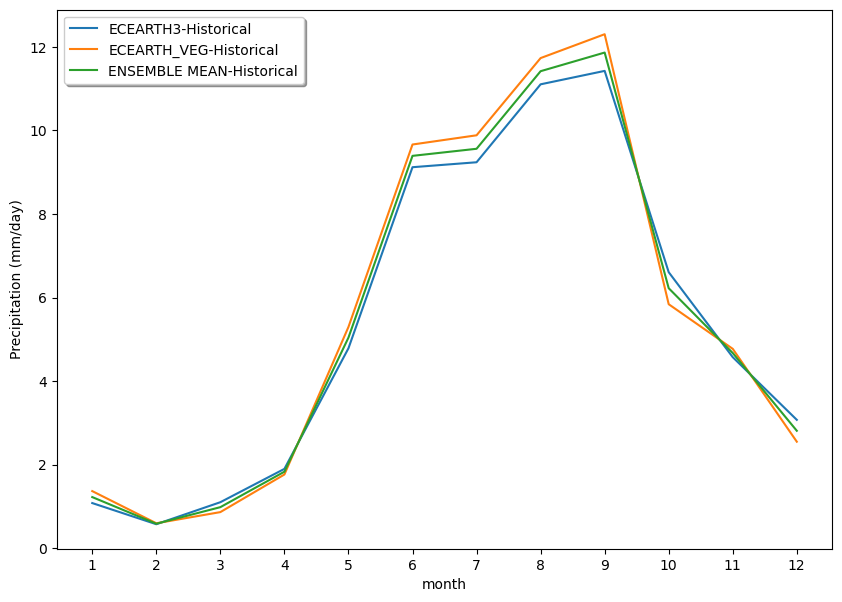

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Precipitation (mm/day)')
plt.show()

[-0.01329944  5.63769993]
[5.6244005  5.61110106 5.59780162 5.58450218 5.57120275 5.55790331
 5.54460387 5.53130443 5.518005   5.50470556 5.49140612 5.47810669
 5.46480725 5.45150781 5.43820837 5.42490894 5.4116095  5.39831006
 5.38501062 5.37171119 5.35841175]


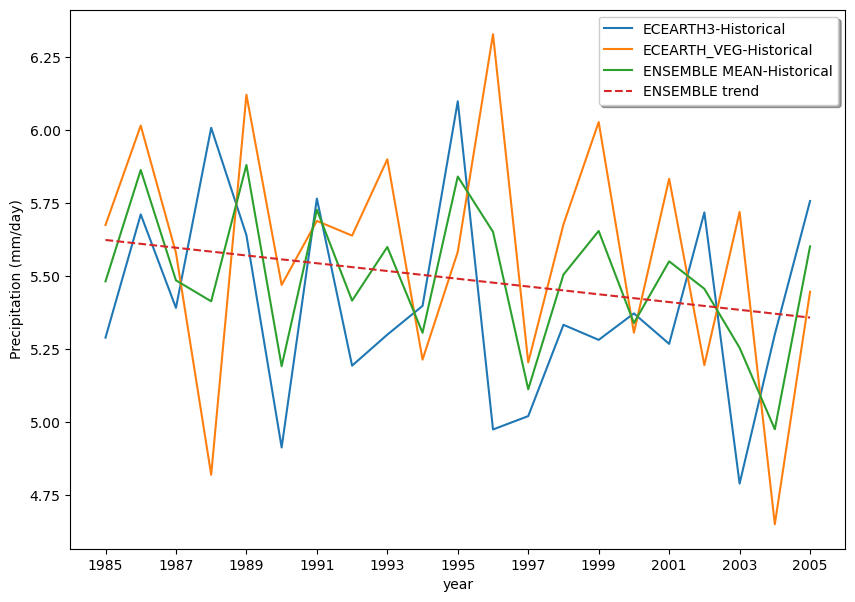

In [25]:
# plt.rcParams.update({'font.size': 12}) 
fig,ax = plt.subplots(figsize=(10,7))
# must set in top
ec3_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend_pr = np.polyfit(np.arange(1,22), esm_hist_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper right', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[-0.00981816  5.93872867]
[5.92891052 5.91909236 5.9092742  5.89945604 5.88963789 5.87981973
 5.87000157 5.86018341 5.85036525 5.8405471  5.83072894 5.82091078
 5.81109262 5.80127447 5.79145631 5.78163815 5.77181999 5.76200184
 5.75218368 5.74236552 5.73254736]


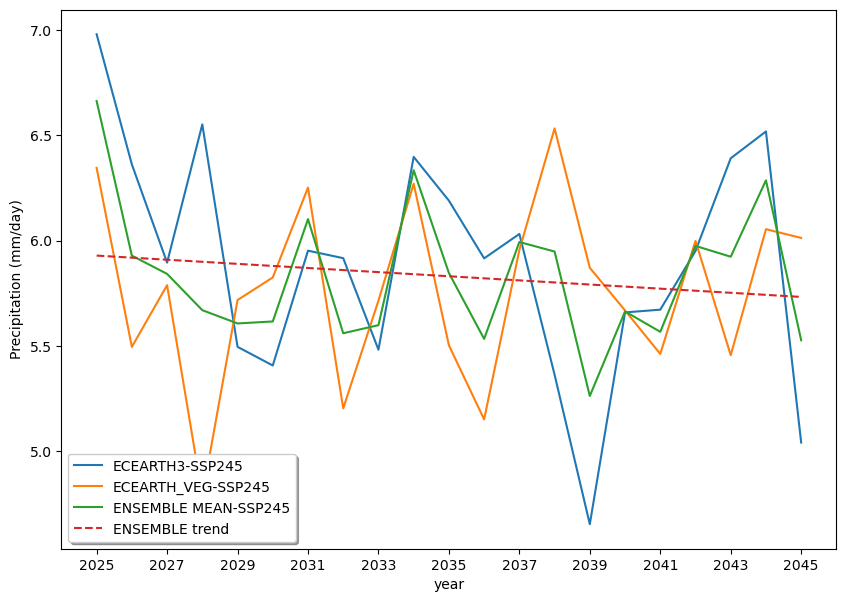

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[-0.0084045   5.61198174]
[5.60357724 5.59517275 5.58676825 5.57836375 5.56995925 5.56155476
 5.55315026 5.54474576 5.53634127 5.52793677 5.51953227 5.51112777
 5.50272328 5.49431878 5.48591428 5.47750979 5.46910529 5.46070079
 5.4522963  5.4438918  5.4354873 ]


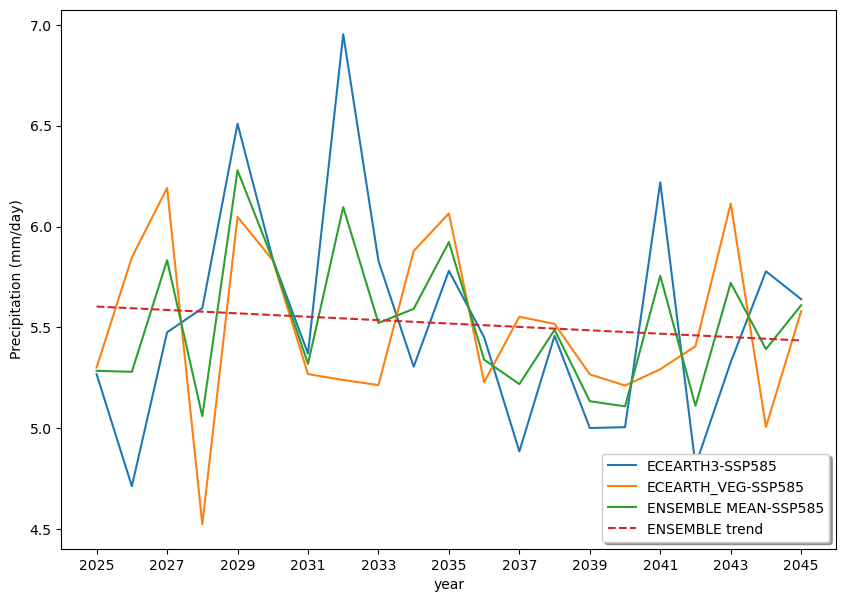

In [27]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower right',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()

In [28]:
Arc_yearly_pr = esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat'])

In [29]:
Arc_yearly_pr

<xarray.DataArray 'pr' (year: 21)>
array([6.663077 , 5.9286065, 5.8419833, 5.6695576, 5.6065826, 5.615925 ,
       6.102186 , 5.5599217, 5.598364 , 6.33414  , 5.8462715, 5.5331373,
       5.993502 , 5.9480753, 5.2617993, 5.6636796, 5.5667925, 5.974878 ,
       5.9235554, 6.2865267, 5.5267467], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [30]:
Arc_clim_pr = esm_hist_pr.mean()

In [31]:
Arc_clim_pr

<xarray.DataArray 'pr' ()>
array(5.491407, dtype=float32)

In [32]:
Arc_anom_pr = Arc_yearly_pr - Arc_clim_pr

In [33]:
df_pr = Arc_anom_pr.to_dataframe()
df_pr['positive'] = df_pr['pr'] > 0
df_pr.head() # show only first five rows

,pr,positive
year,,
2025,1.171670,True
2026,0.437200,True
2027,0.350576,True
2028,0.178151,True
2029,0.115176,True


[-0.00981816  0.44732176]
[0.4375036  0.42768544 0.41786728 0.40804913 0.39823097 0.38841281
 0.37859465 0.36877649 0.35895834 0.34914018 0.33932202 0.32950386
 0.31968571 0.30986755 0.30004939 0.29023123 0.28041308 0.27059492
 0.26077676 0.2509586  0.24114045]


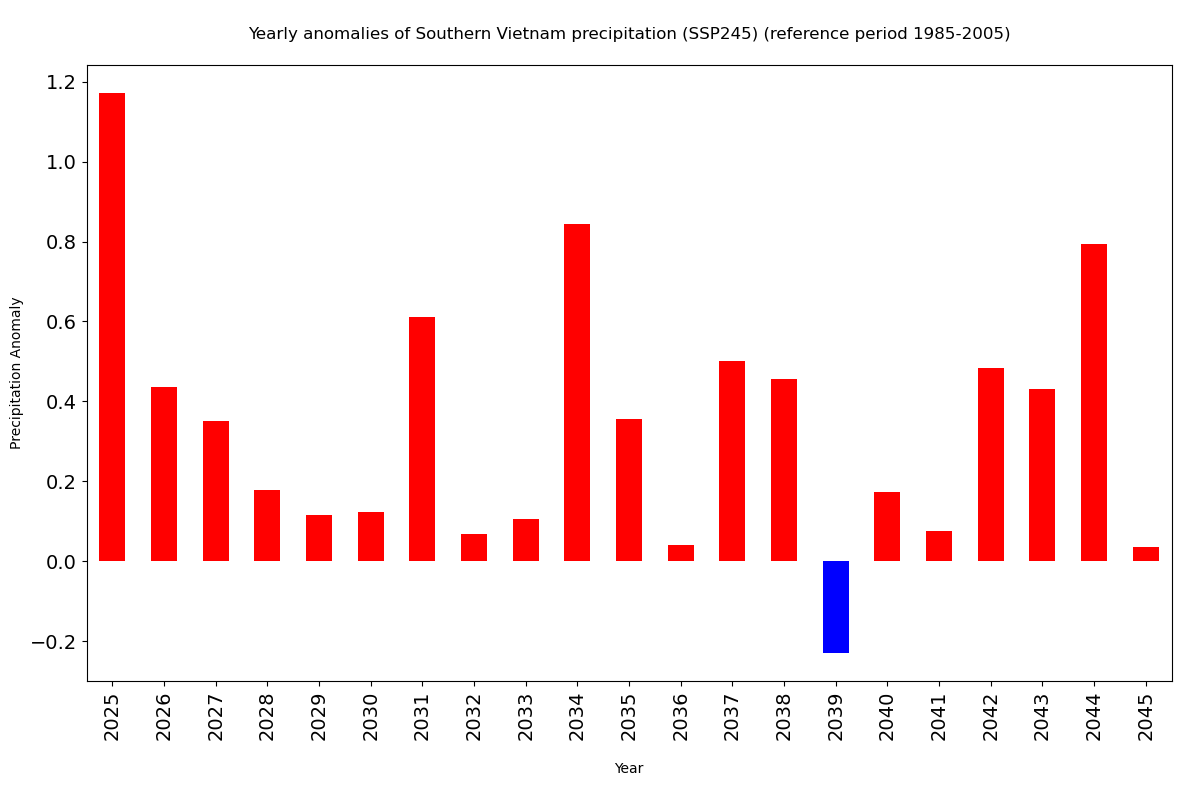

In [34]:
# # fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP245) (reference period 1985-2005)\n',
    )
trend_pr = np.polyfit(np.arange(1,22), df_pr.pr, 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr
print(y_pr)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()

In [35]:
Arc_yearly2_pr = esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat'])

In [36]:
Arc_yearly2_pr

<xarray.DataArray 'pr' (year: 21)>
array([5.285136 , 5.280156 , 5.833403 , 5.0601497, 6.2788215, 5.8361735,
       5.319594 , 6.0965095, 5.52222  , 5.59218  , 5.923064 , 5.3402667,
       5.2192097, 5.488296 , 5.1344767, 5.1090665, 5.756045 , 5.111667 ,
       5.72089  , 5.3924994, 5.610353 ], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [37]:
Arc_clim2_pr = esm_hist_pr.mean()

In [38]:
Arc_clim2_pr

<xarray.DataArray 'pr' ()>
array(5.491407, dtype=float32)

In [39]:
Arc_anom2_pr = Arc_yearly2_pr - Arc_clim2_pr

In [40]:
df2_pr = Arc_anom2_pr.to_dataframe()
df2_pr['positive'] = df2_pr['pr'] > 0
# print(df2)
df2_pr.head() # show only first five rows

,pr,positive
year,,
2025,-0.206271,False
2026,-0.211251,False
2027,0.341996,True
2028,-0.431257,False
2029,0.787415,True


[-0.0084045   0.12057482]
[ 0.11217032  0.10376583  0.09536133  0.08695683  0.07855234  0.07014784
  0.06174334  0.05333885  0.04493435  0.03652985  0.02812535  0.01972086
  0.01131636  0.00291186 -0.00549263 -0.01389713 -0.02230163 -0.03070613
 -0.03911062 -0.04751512 -0.05591962]


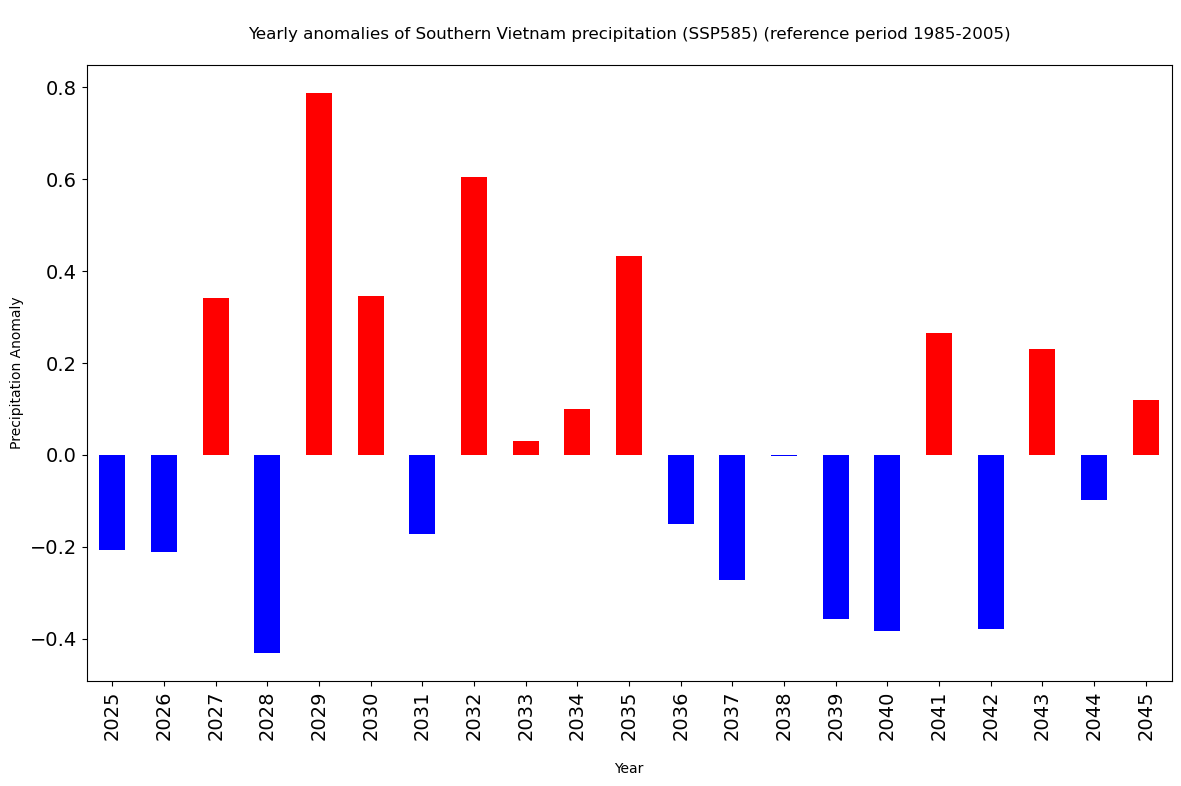

In [41]:
# plt.rcParams.update({'font.size': 18}) # must set in top
df2_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP585) (reference period 1985-2005)\n',
    )
trend2_pr = np.polyfit(np.arange(1,22), df2_pr.pr, 1)
print(trend2_pr)
theta12_pr=trend2_pr[1]
theta02_pr=trend2_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2_pr= np.arange(1,22)*theta02_pr + theta12_pr
print(y2_pr)